In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import numpy as np
# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
df = pd.read_csv('/Users/arman/Skripsi/Dataset/BigData/Fix/Piala-Dunia-Label-Clean.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df

,Steming,Label
0,lupa gagal tuan rumah piala dunia mari tata se...,negatif
1,gagal helat piala dunia indonesia jadi alam de...,positif
2,citra bela palestina guna syal palestina baca ...,negatif
3,tuan rumah piala dunia bentar tuan rumah,netral
4,ketua erick thohir alas fifa batal posisi indo...,netral
...,...,...
14802,piala dunia batal gelar indonesia,netral
14803,juang indonesia tuan rumah piala dunia siasia,negatif
14804,guru indonesia tuan rumah piala dunia nasib sa...,netral
14805,main timnas indonesia ramai ramai tumpah kecew...,negatif


## Split Dataset

In [3]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Steming'], df['Label'],
                                                                    test_size = 0.2, random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutanny

In [4]:
# Membuat data frame dari hasil split
df_train80 = pd.DataFrame()
df_train80['Steming'] = train_X
df_train80['Label'] = train_Y

df_test20 = pd.DataFrame()
df_test20['Steming'] = test_X
df_test20['Label'] = test_Y

In [38]:
df_test20.to_csv('/Users/arman/Skripsi/Dataset/3000/test20')

## Pembobotan TF-IDF

In [5]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_8020 = TfidfVectorizer()
tfidf_vect_8020.fit(df['Steming'])
train_X_tfidf_8020 = tfidf_vect_8020.transform(df_train80['Steming'])
test_X_tfidf_8020 = tfidf_vect_8020.transform(df_test20['Steming'])

In [6]:
print(train_X_tfidf_8020.shape)
print(test_X_tfidf_8020.shape)

(11845, 9978)
(2962, 9978)


In [7]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_8020.vocabulary_)

{'lupa': 5036, 'gagal': 2582, 'tuan': 9315, 'rumah': 7678, 'piala': 6933, 'dunia': 2141, 'mari': 5221, 'tata': 8867, 'sepak': 8119, 'bola': 1147, 'indonesia': 3379, 'depan': 1775, 'kelam': 4165, 'mata': 5275, 'internasional': 3521, 'anti': 369, 'jajah': 3675, 'sinar': 8288, 'persepakbolaan': 6867, 'helat': 3100, 'jadi': 3655, 'alam': 195, 'dewasa': 1813, 'bangun': 701, 'semangat': 8044, 'tanah': 8803, 'air': 124, 'cinta': 1496, 'sepakbola': 8122, 'kuat': 4637, 'milik': 5585, 'respons': 7555, 'citra': 1509, 'bela': 855, 'palestina': 6540, 'guna': 2911, 'syal': 8712, 'baca': 579, 'buku': 1279, 'kait': 3951, 'sok': 8420, 'duluan': 2132, 'ganjar': 2632, 'kurang': 4672, 'tapi': 8843, 'pas': 6634, 'diam': 1826, 'kontradiktif': 4531, 'bentar': 907, 'ketua': 4315, 'erick': 2329, 'thohir': 9083, 'alas': 200, 'fifa': 2460, 'batal': 769, 'posisi': 7105, 'lanjut': 4778, 'ajang': 135, 'situasi': 8334, 'kini': 4362, 'deret': 1785, 'nyata': 6310, 'bijak': 1047, 'pranowo': 7151, 'tuai': 9312, 'kontrov

## Penerapan Model SVM

In [9]:
from sklearn import svm
from sklearn.svm import SVC

#Menerapkan pemodelan SVM pada data train
model = SVC(kernel='linear', 
            decision_function_shape='ovr')
clf = model.fit(train_X_tfidf_8020,train_Y)

predictions_SVM_8020 = clf.predict(test_X_tfidf_8020)

# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='linear', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

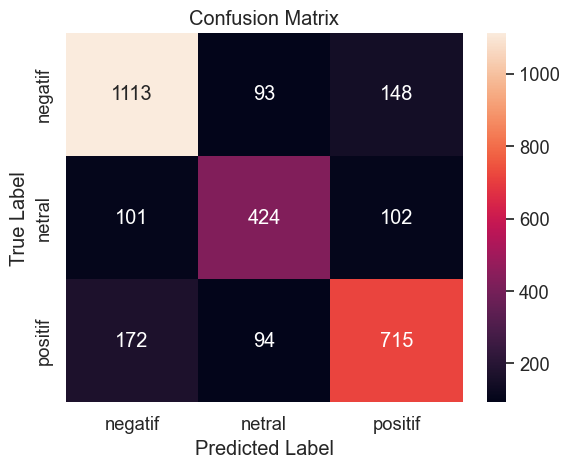

In [11]:
# Proses Pengujian
predictions_SVM_8020 = clf.predict(test_X_tfidf_8020)

from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_8020), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [12]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions_SVM_8020))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_8020))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_8020, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_8020, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_8020, average='macro'))



              precision    recall  f1-score   support

     negatif       0.80      0.82      0.81      1354
      netral       0.69      0.68      0.68       627
     positif       0.74      0.73      0.73       981

    accuracy                           0.76      2962
   macro avg       0.75      0.74      0.74      2962
weighted avg       0.76      0.76      0.76      2962

Accuracy of the model :  0.7602970965563808
Precision of the model:  0.7459690996787237
Recall of the model:  0.7423643404851864
F1-score of the model:  0.7440750751200946


# Pemodelan Naive Bayes

In [10]:
#coba
from sklearn.naive_bayes import GaussianNB

clfNB = GaussianNB()
clfNB.fit(train_X_tfidf_8020,train_Y)
predictions= clfNB.predict(test_X_tfidf_8020)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

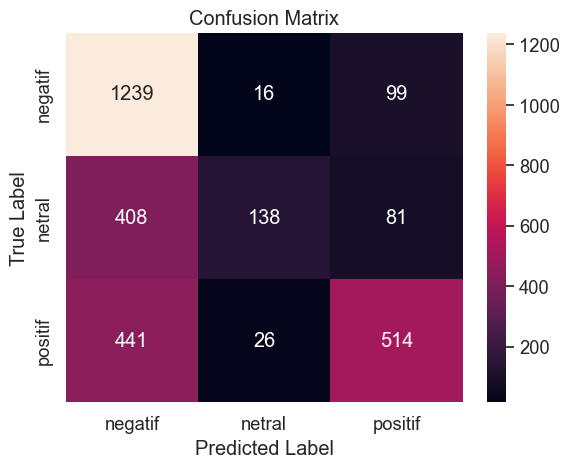

In [35]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [36]:
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions))


              precision    recall  f1-score   support

     negatif       0.59      0.92      0.72      1354
      netral       0.77      0.22      0.34       627
     positif       0.74      0.52      0.61       981

    accuracy                           0.64      2962
   macro avg       0.70      0.55      0.56      2962
weighted avg       0.68      0.64      0.60      2962



## Pemodelan RandomForest

In [31]:
#coba
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_X_tfidf_8020,train_Y)
predictionsRF= rf.predict(test_X_tfidf_8020)

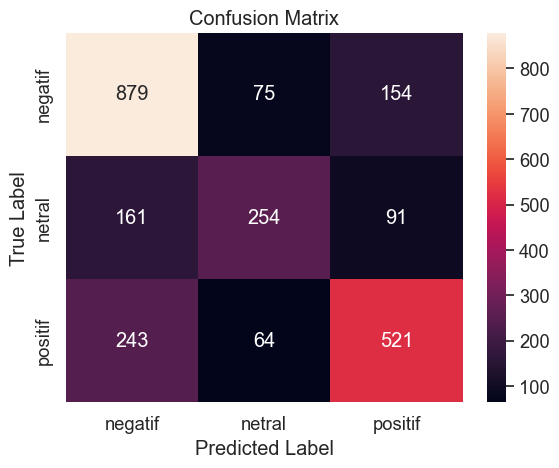

              precision    recall  f1-score   support

     negatif       0.69      0.79      0.74      1108
      netral       0.65      0.50      0.57       506
     positif       0.68      0.63      0.65       828

    accuracy                           0.68      2442
   macro avg       0.67      0.64      0.65      2442
weighted avg       0.68      0.68      0.67      2442



In [37]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictionsRF), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print (classification_report(test_Y, predictionsRF))

## KNN clasifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

kn = RandomForestClassifier()
kn.fit(train_X_tfidf_8020,train_Y)
predictionsKN= kn.predict(test_X_tfidf_8020)

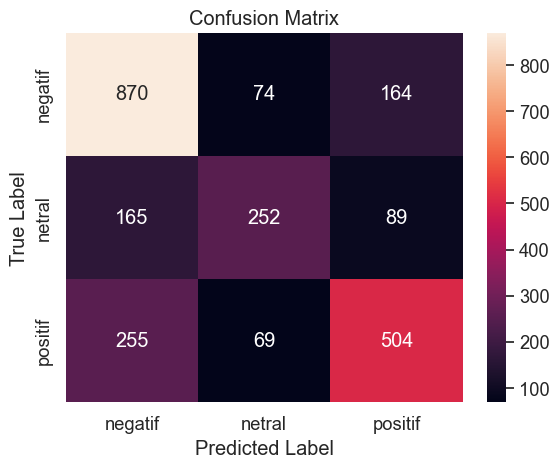

              precision    recall  f1-score   support

     negatif       0.67      0.79      0.73      1108
      netral       0.64      0.50      0.56       506
     positif       0.67      0.61      0.64       828

    accuracy                           0.67      2442
   macro avg       0.66      0.63      0.64      2442
weighted avg       0.66      0.67      0.66      2442



In [38]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictionsKN), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print (classification_report(test_Y, predictionsKN))